In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Ex. 1: Correlations in AR models

In [2]:
def AR(steps, df: np.array, c, lags: np.array, phi: np.array, burnin):

    #generating white noise
    np.random.seed(100)
    noise = np.random.normal(0, 1, len(df) + steps + burnin + 100)
    disc = lags[len(lags) - 1]

    res = np.array([])

    #make the start of array that we'll discard later
    for i in range(disc, 2 * disc):

        new = c

        #adding previous values in another loop
        for j in range(0, len(lags)):
            new += phi[j] * df[i - lags[j]]

        #adding white noise
        new += noise[i]    

        #appending new value
        res = np.append(res, new)

    #start calculating the AR model
    for i in range(0, steps + burnin):

        new = c

        #adding previous values of res
        for j in range(0, len(lags)):
            new += phi[j] * res[disc + i - lags[j]]

        #adding white noise
        new += noise[i + 99]

        #appending new value
        res = np.append(res, new)

    #discarding first n values
    dlt = np.arange(disc + burnin)
    res = np.delete(res, dlt, 0)

    return res

### y_t = 18 - 0.6y_(t-1) + e_t

C:\Users\Rudy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


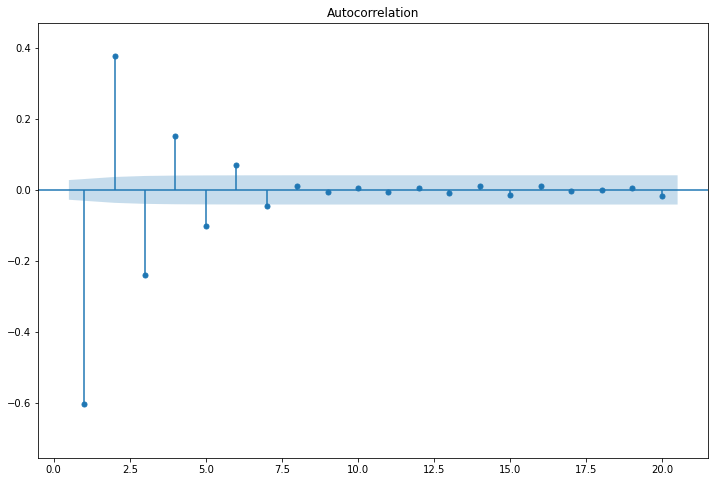

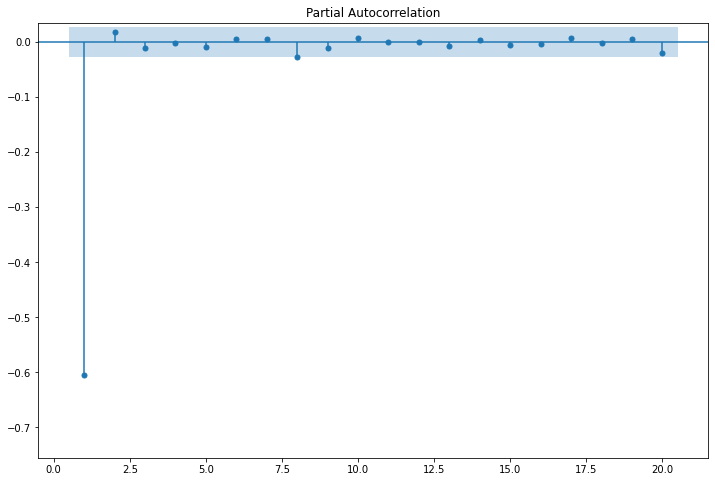

In [3]:
df = AR(5000, np.array([0, 1]), 18, np.array([1]), np.array([-0.6]), 20)

plt.rc("figure", figsize=(12,8))
plot_acf(df, lags = 20, zero = False, auto_ylims = True);
plot_pacf(df, lags = 20, zero = False, auto_ylims = True);

In [4]:
adfuller(df) # null hypothesis: time series is non-stationary

(-62.123654307973524,
 0.0,
 1,
 4998,
 {'1%': -3.431659055967043,
  '5%': -2.862118461132801,
  '10%': -2.5670779155711902},
 14274.691707863805)

#### p value is really low - have to reject null hypothesis

### y_t = 18 - 0.7y_(t-1) + e_t

C:\Users\Rudy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


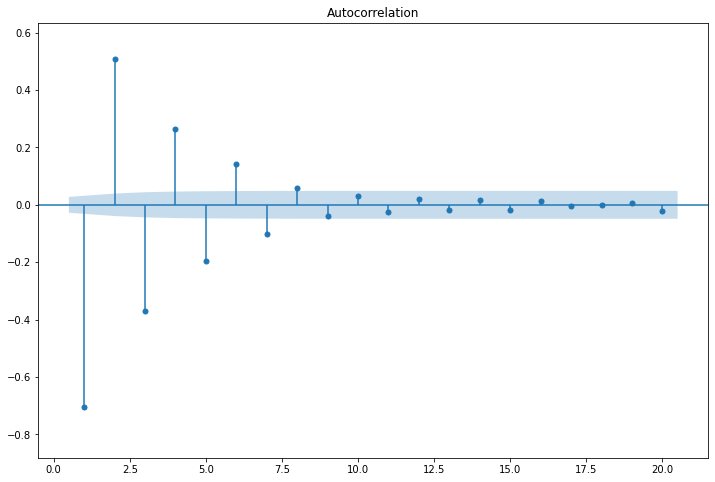

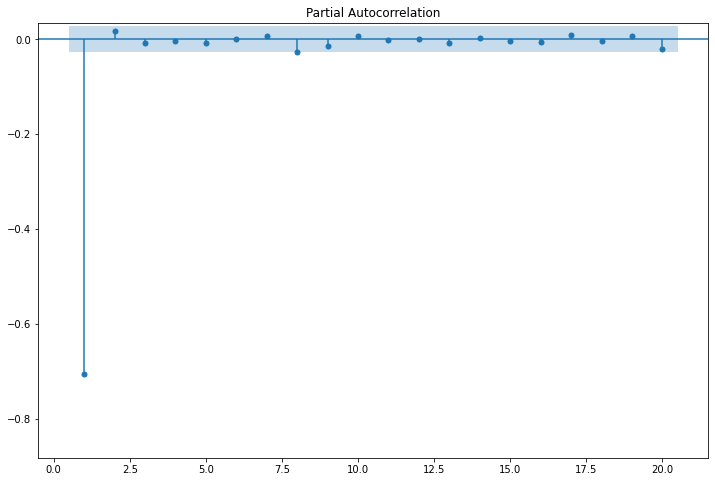

In [5]:
df = AR(5000, np.array([0, 1]), 18, np.array([1]), np.array([-0.7]), 20)

plt.rc("figure", figsize=(12,8))
plot_acf(df, lags = 20, zero = False, auto_ylims = True);
plot_pacf(df, lags = 20, zero = False, auto_ylims = True);

In [6]:
adfuller(df) # null hypothesis: time series is non-stationary

(-64.06615958142945,
 0.0,
 1,
 4998,
 {'1%': -3.431659055967043,
  '5%': -2.862118461132801,
  '10%': -2.5670779155711902},
 14274.435292301929)

#### p value is really low - have to reject null hypothesis

### y_t = 18 - 0.8y_(t-1) + e_t

C:\Users\Rudy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


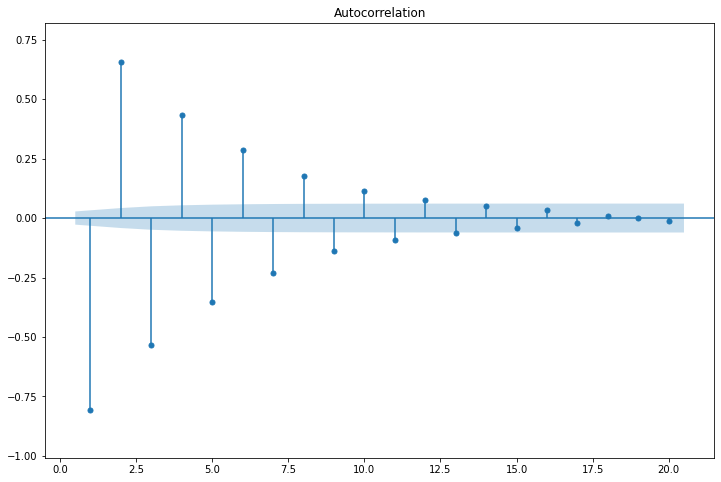

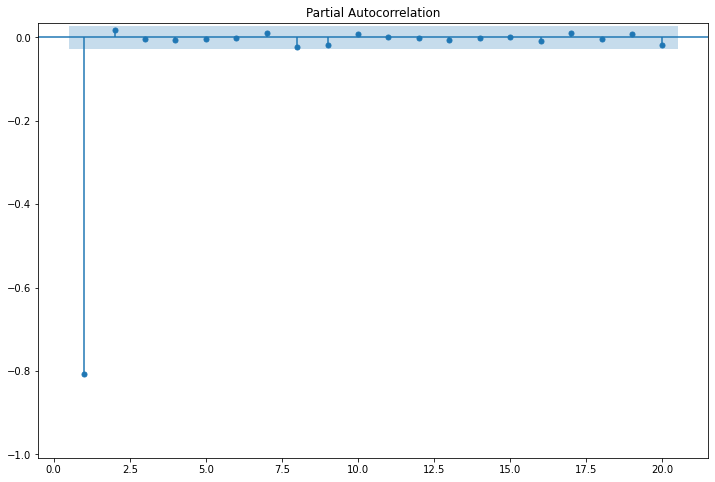

In [7]:
df = AR(5000, np.array([0, 1]), 18, np.array([1]), np.array([-0.8]), 20)

plt.rc("figure", figsize=(12,8))
plot_acf(df, lags = 20, zero = False, auto_ylims = True);
plot_pacf(df, lags = 20, zero = False, auto_ylims = True);

In [8]:
adfuller(df) # null hypothesis: time series is non-stationary

(-215.91106355762136,
 0.0,
 0,
 4999,
 {'1%': -3.431658793968827,
  '5%': -2.862118345383404,
  '10%': -2.567077853953267},
 14274.296777222218)

#### p value is really low - have to reject null hypothesis

### y_t = 18 - 0.9y_(t-1) + e_t

C:\Users\Rudy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


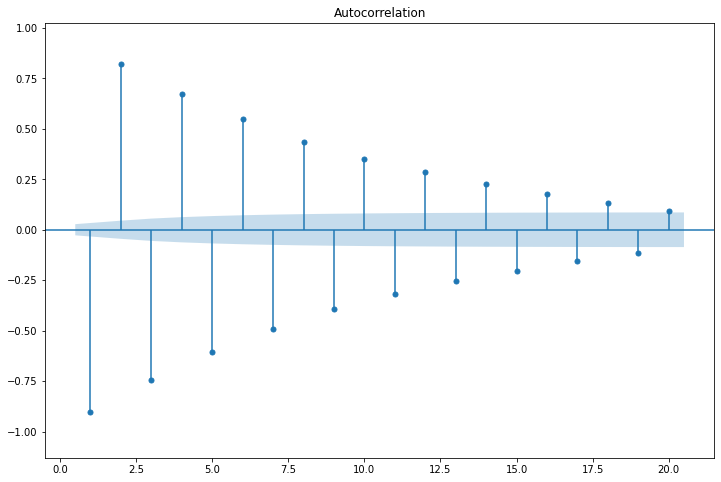

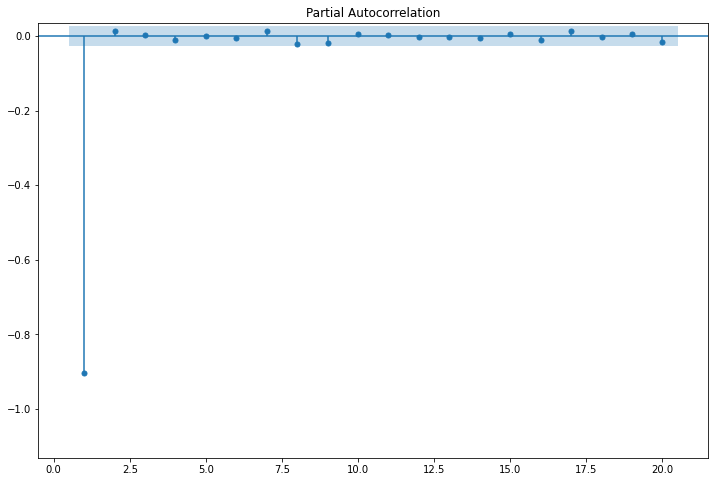

In [9]:
df = AR(5000, np.array([0, 1]), 18, np.array([1]), np.array([-0.9]), 20)

plt.rc("figure", figsize=(12,8))
plot_acf(df, lags = 20, zero = False, auto_ylims = True);
plot_pacf(df, lags = 20, zero = False, auto_ylims = True);

In [10]:
adfuller(df) # null hypothesis: time series is non-stationary

(-315.27444169235434,
 0.0,
 0,
 4999,
 {'1%': -3.431658793968827,
  '5%': -2.862118345383404,
  '10%': -2.567077853953267},
 14274.306122113856)

#### p value is really low - have to reject null hypothesis

### phi > 1

C:\Users\Rudy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


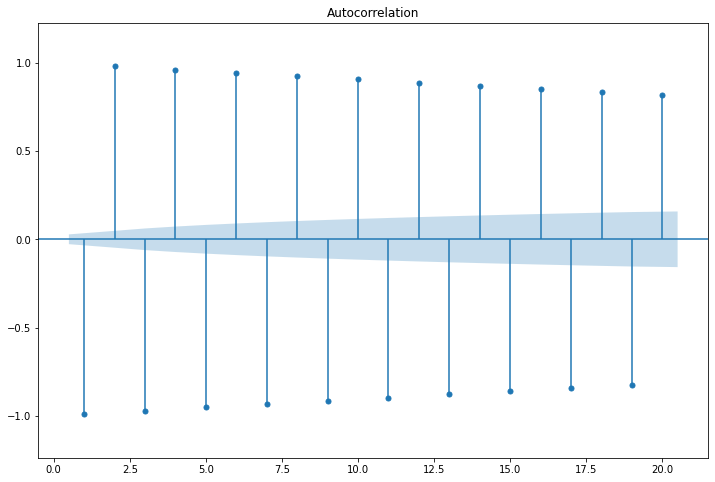

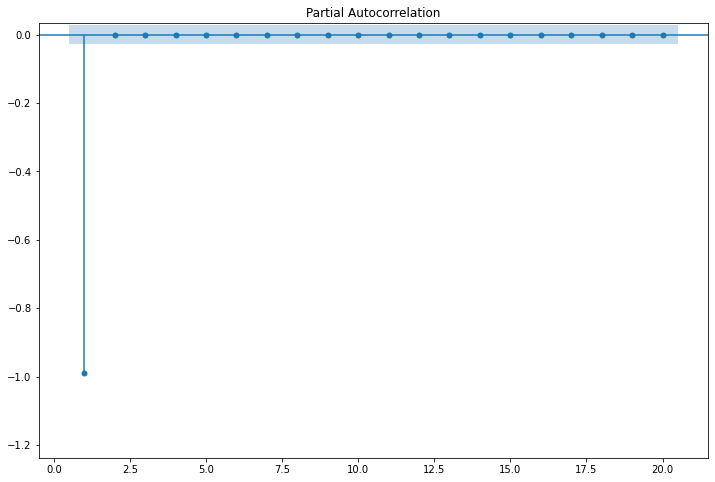

In [11]:
df = AR(5000, np.array([0, 1]), 18, np.array([1]), np.array([-1.01]), 20)

plt.rc("figure", figsize=(12,8))
plot_acf(df, lags = 20, zero = False, auto_ylims = True);
plot_pacf(df, lags = 20, zero = False, auto_ylims = True);

### AR(2) model

C:\Users\Rudy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


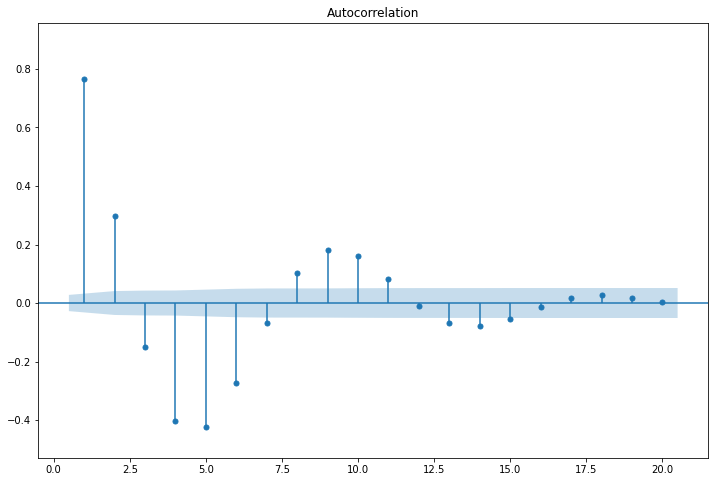

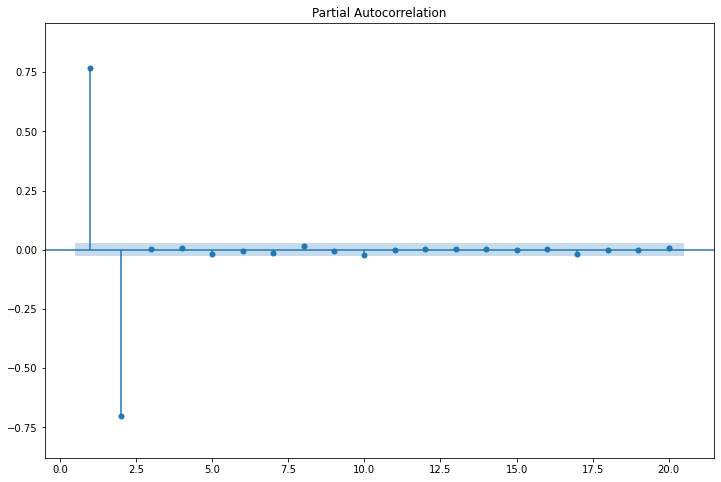

In [12]:
df = AR(5000, np.array([0, 1, 2]), 8, np.array([1, 2]), np.array([1.3, -0.7]), 20)

plt.rc("figure", figsize=(12,8))
plot_acf(df, lags = 20, zero = False, auto_ylims = True);
plot_pacf(df, lags = 20, zero = False, auto_ylims = True);

# Ex. 2: AR forecasting

In [13]:
df = pd.read_csv('coffee.csv', sep = '\t', index_col = 'Month', parse_dates = True)
df.index.freq = 'MS'
df

,Price,Change
Month,,
2002-06-01,0.63,-
2002-07-01,0.63,0.00%
2002-08-01,0.61,-3.17%
2002-09-01,0.71,16.39%
2002-10-01,0.73,2.82%
...,...,...
2021-09-01,2.31,10.00%
2021-10-01,2.32,0.43%
2021-11-01,2.41,3.88%


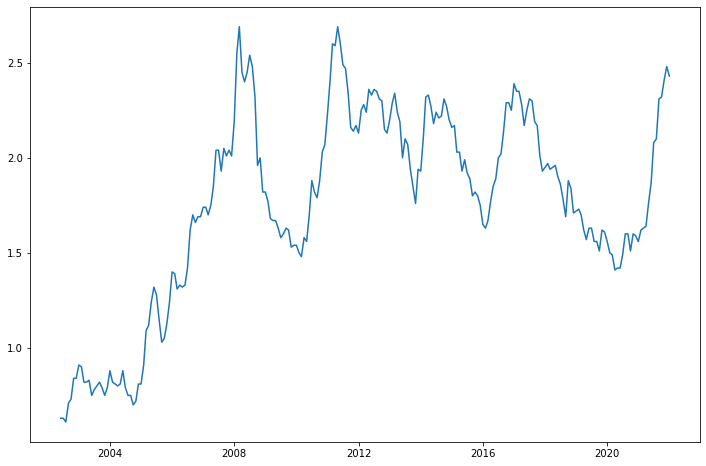

In [14]:
plt.rc("figure", figsize=(12,8))
plt.plot(df['Price'])

In [15]:
train = df.iloc[:225]
test = df.iloc[225:]
start = len(train)
stop = len(df) - 1

### Looking for best amount of lags to use

In [16]:
#looking for best fit
min = 1
min_lags = 0

for i in range(1, 112):
    lags = i
    AR1fit = AutoReg(train['Price'], lags = lags).fit()
    predictionsAR1 = AR1fit.predict(start = start, end = stop, dynamic = True).rename('AR predict')
    new_min = mean_squared_error(test['Price'], predictionsAR1)

    if(new_min < min):
        min = new_min
        min_lags = lags

print("Minimal value of MAPE: " + str(min) + " at lag = " + str(min_lags))

Minimal value of MAPE: 0.0698144488462149 at lag = 58


In [17]:
AR1fit = AutoReg(train['Price'], lags = min_lags).fit()
predictionsAR1 = AR1fit.predict(start = start, end = stop, dynamic = True).rename('AR predict')

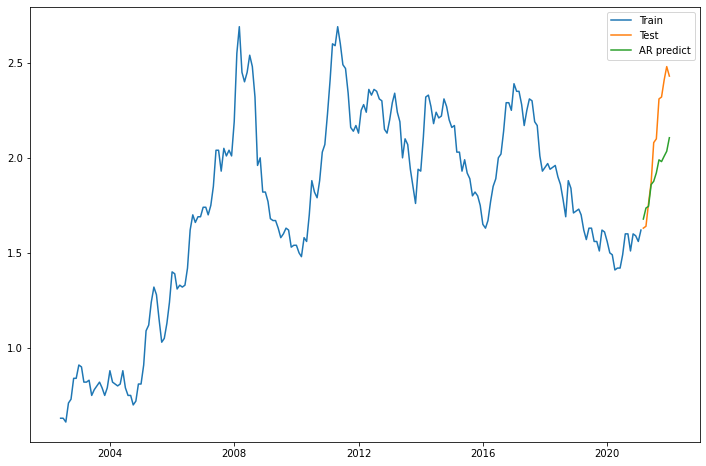

In [18]:
plt.plot(train['Price'])
plt.plot(test['Price'])
plt.plot(predictionsAR1)
plt.legend(['Train', 'Test', 'AR predict'])

### Final forecast of 12 months

In [19]:
AR1fit = AutoReg(df['Price'], lags = min_lags).fit()
predictionsAR1 = AR1fit.predict(start = stop + 1, end = stop + 12, dynamic = True).rename('AR predict')
predictionsAR1

2022-02-01    2.416327
2022-03-01    2.456530
2022-04-01    2.443490
2022-05-01    2.359100
2022-06-01    2.402326
2022-07-01    2.445868
2022-08-01    2.419660
2022-09-01    2.459690
2022-10-01    2.405128
2022-11-01    2.324549
2022-12-01    2.308109
2023-01-01    2.220362
Freq: MS, Name: AR predict, dtype: float64

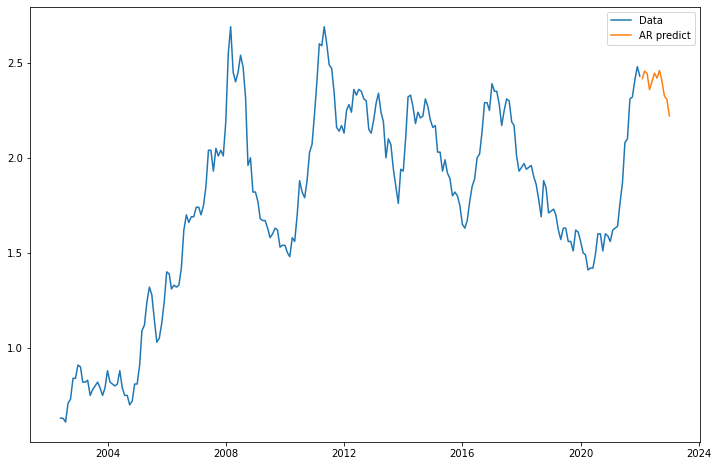

In [20]:
plt.plot(df['Price'])
plt.plot(predictionsAR1)
plt.legend(['Data', 'AR predict'])

### Differencing

In [21]:
df['dif1'] = df['Price'].diff()
df

,Price,Change,dif1
Month,,,
2002-06-01,0.63,-,NaN
2002-07-01,0.63,0.00%,0.00
2002-08-01,0.61,-3.17%,-0.02
2002-09-01,0.71,16.39%,0.10
2002-10-01,0.73,2.82%,0.02
...,...,...,...
2021-09-01,2.31,10.00%,0.21
2021-10-01,2.32,0.43%,0.01
2021-11-01,2.41,3.88%,0.09


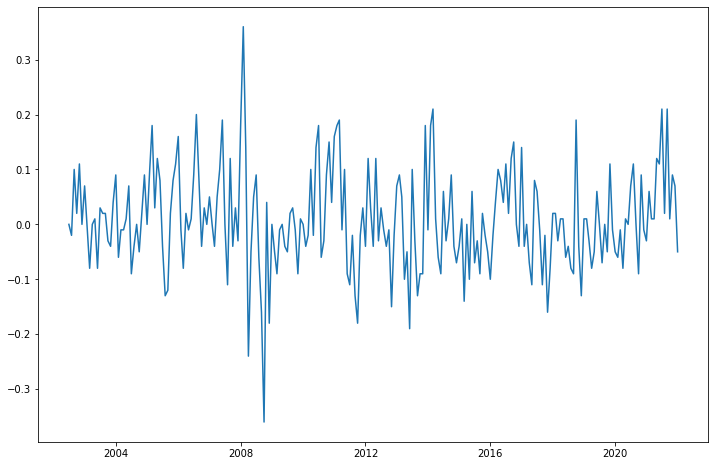

In [22]:
plt.plot(df['dif1'])

### Looking for best amount of lags to use

In [23]:
train = df['dif1'].iloc[1:225]
test = df['dif1'].iloc[225:]
start = len(train)
stop = len(df) - 2

In [24]:
#looking for best fit
min = 1
min_lags = 0

for i in range(1, 112):
    lags = i
    AR1fit = AutoReg(train, lags = lags).fit()
    predictionsAR1 = AR1fit.predict(start = start, end = stop, dynamic = True).rename('AR predict')
    new_min = mean_squared_error(test, predictionsAR1)

    if(new_min < min):
        min = new_min
        min_lags = lags

print("Minimal value of MAPE: " + str(min) + " at lag = " + str(min_lags))

Minimal value of MAPE: 0.010681457493884163 at lag = 31


In [25]:
AR1fit = AutoReg(train, lags = min_lags).fit()
predictionsAR1 = AR1fit.predict(start = start, end = stop, dynamic = True).rename('AR predict')
predictionsAR1

2021-03-01   -0.019330
2021-04-01    0.027738
2021-05-01    0.026363
2021-06-01    0.022108
2021-07-01    0.006205
2021-08-01    0.009899
2021-09-01    0.014224
2021-10-01    0.016739
2021-11-01   -0.009306
2021-12-01    0.007688
2022-01-01    0.027946
Freq: MS, Name: AR predict, dtype: float64

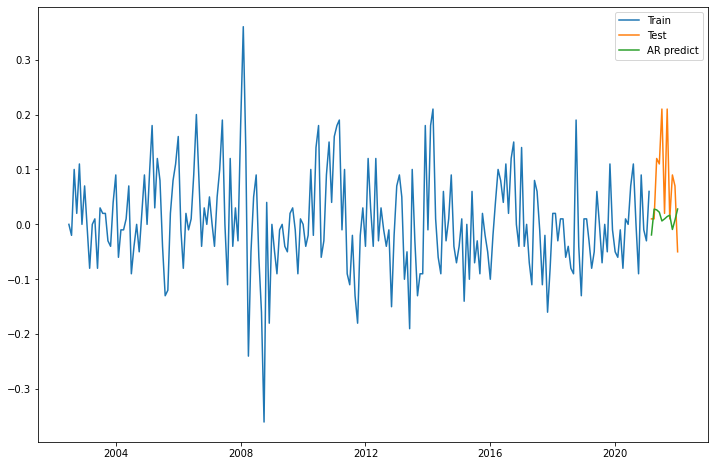

In [26]:
plt.plot(train)
plt.plot(test)
plt.plot(predictionsAR1)
plt.legend(['Train', 'Test', 'AR predict'])

### Going back from differencing

In [27]:
#first value
beforeDiff = np.array([df['Price'][len(train)] + predictionsAR1[0]])

#rest
for i in range(0, len(predictionsAR1) - 1):
    beforeDiff = np.append(beforeDiff, beforeDiff[i] + predictionsAR1[i + 1])

beforeDiff = pd.DataFrame(beforeDiff, columns = ['AR Predict'])
beforeDiff = beforeDiff.set_index(test.index)

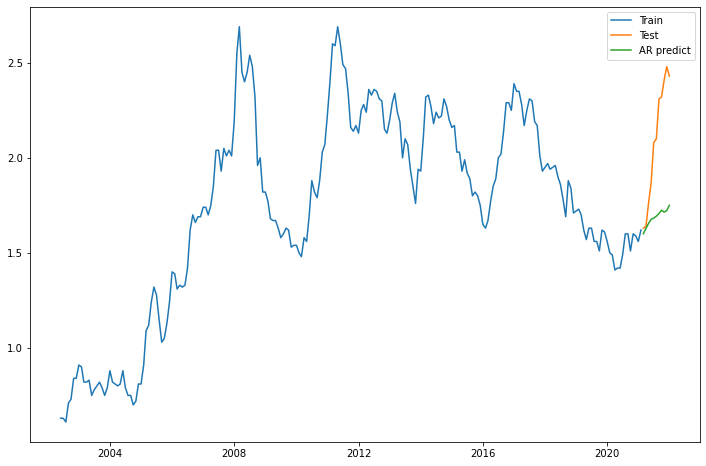

In [28]:
plt.plot(df['Price'].iloc[:225])
plt.plot(df['Price'].iloc[225:])
plt.plot(beforeDiff)
plt.legend(['Train', 'Test', 'AR predict'])

### Final forecast for 12 months

In [29]:
AR1fit = AutoReg(df['dif1'].iloc[1:], lags = min_lags).fit()
predictionsAR1 = AR1fit.predict(start = stop, end = stop + 11, dynamic = True).rename('AR predict')
predictionsAR1

2022-01-01    0.042869
2022-02-01   -0.003478
2022-03-01    0.019412
2022-04-01   -0.001430
2022-05-01   -0.033214
2022-06-01   -0.007721
2022-07-01    0.022754
2022-08-01   -0.033273
2022-09-01    0.017033
2022-10-01   -0.055161
2022-11-01   -0.016745
2022-12-01   -0.010318
Freq: MS, Name: AR predict, dtype: float64

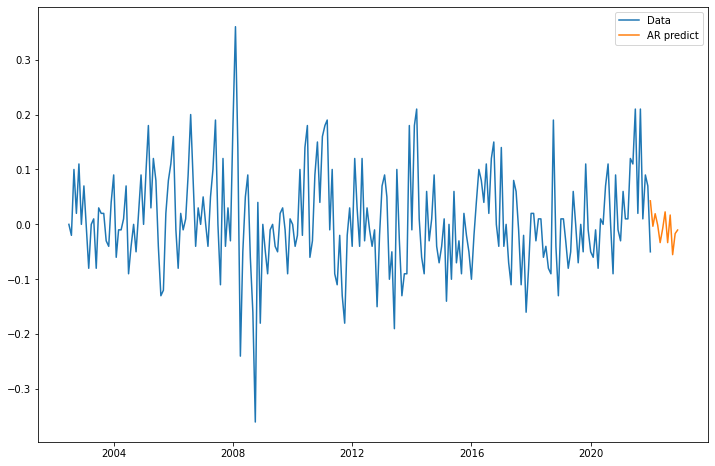

In [30]:
plt.plot(df['dif1'])
plt.plot(predictionsAR1)
plt.legend(['Data', 'AR predict'])

### Going back from differencing

In [31]:
#first value
beforeDiff = np.array([df['Price'][len(df) - 1] + predictionsAR1[0]])

#rest
for i in range(0, len(predictionsAR1) - 1):
    beforeDiff = np.append(beforeDiff, beforeDiff[i] + predictionsAR1[i + 1])

beforeDiff = pd.DataFrame(beforeDiff, columns = ['AR Predict'])
index = pd.date_range(start = "2022-01-01", end = "2022-12-01", freq = "MS")
beforeDiff = beforeDiff.set_index(index)
beforeDiff

,AR Predict
2022-01-01,2.472869
2022-02-01,2.469391
2022-03-01,2.488803
2022-04-01,2.487373
2022-05-01,2.454159
2022-06-01,2.446438
2022-07-01,2.469192
2022-08-01,2.435919
2022-09-01,2.452952
2022-10-01,2.397791


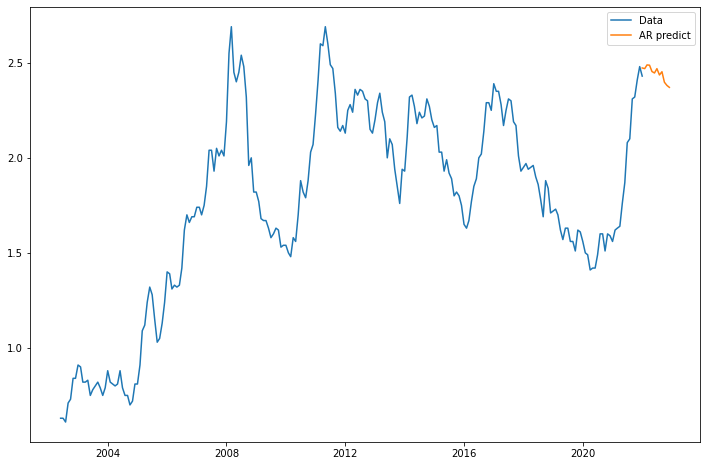

In [32]:
plt.plot(df['Price'])
plt.plot(beforeDiff)
plt.legend(['Data', 'AR predict'])

##### According to MAPE differencing the data gives more accurate results but it's hard to tell